In this section, we take the test wav file, and see if we can extract formants

c:\users\k82wong\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


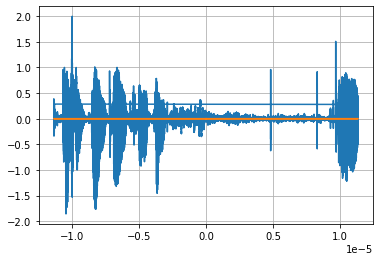

In [1]:
import numpy as np
import numpy.fft as fft
import soundfile as sf

import IPython.display as ipd
from IPython.display import HTML

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from itertools import islice

x, fs = sf.read('data/test.wav')
x = x/np.max(np.abs(x))
x_fft = fft.fft(x);
y = fft.fftfreq(len(x_fft), d = fs)
plt.grid()
#plt.xscale("log")
plt.plot(y, x_fft)

AttributeError: module 'matplotlib.animation' has no attribute 'save'

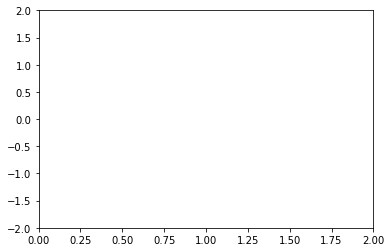

In [6]:
def make_chunks(data, grain):
    it = iter(data)
    # use `xragne` if you are in python 2.7:
    for i in range(0, len(data), grain):
        yield [k for k in islice(it, grain)]

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

animation.save('animation.gif', writer='PillowWriter', fps=2)

In [ ]:
for sample in make_chunks(x, 100):
    sample_fft = fft.fft(sample)
    plt.plot(fft.fftfreq(len(sample_fft), d = fs), sample_fft)

In [42]:
sf.write('data/test_processed.wav', x, fs)
ipd.Audio('data/test_processed.wav') 